## Setup 

In [45]:
from numpy import * # package for numerical calculations
from pylab import * # package for graphics
from control import * # package for control theory calculations
from control.matlab import * # package for control theory calculations
ion() # display graphics automatically

## Representação do sistema em malha aberta

In [46]:
sys = tf([2], [1, 0.5, 0]) # Define a transfer function
sys


     2
-----------
s^2 + 0.5 s

### Sistema em espaço de Estados

In [76]:
sys_ss = tf2ss(sys)
A, B, C, D = sys_ss.A, sys_ss.B, sys_ss.C, sys_ss.D
sys_ss

A = [[-0.5 -0. ]
 [ 1.   0. ]]

B = [[1.]
 [0.]]

C = [[0. 2.]]

D = [[0.]]

### Diagrama de polos e zeros

(array([-0.5,  0. ]), array([], dtype=float64))

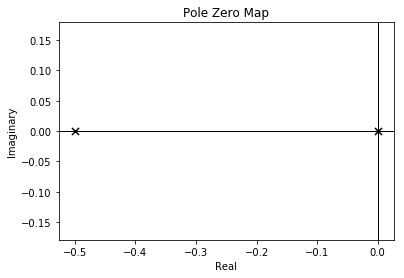

In [77]:
pzmap(sys)

### Resposta ao degrau

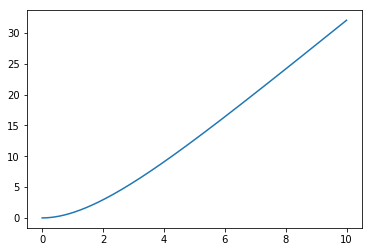

In [78]:
T = np.arange(0,10,0.001)
T, y = step_response(sys, T) 

plt.plot(T, y)

## Representação do sistema em malha fechada

In [79]:
sysmf_tf = sys / (1 + sys) 
sysmf_tf


        2 s^2 + s
------------------------
s^4 + s^3 + 2.25 s^2 + s

### Polos e zeros

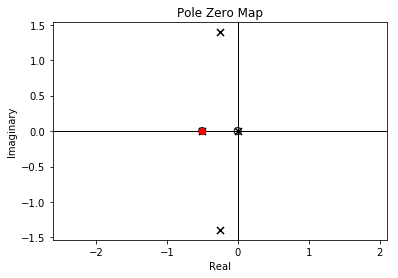

In [80]:
a = pzmap(sysmf_tf) 
plt.plot(a[1][0], a[1][1], 'or') 

## Projeto do controlador por espaço de estados

In [81]:
from sympy import Symbol, solve, log, sqrt
x = Symbol('x')

In [82]:
from sympy.functions.elementary import exponential

In [83]:
xi = solve(0.1631 - exponential.exp(-x*pi/sqrt(1-x**2)), rational=False)

In [84]:
xi

[0.499915723335591]

In [85]:
K = place(A,B,[complex(-2,3.46),complex(-2,-3.46)])

A = A - dot(B,K)

sysmf_ss =  StateSpace(A,B,C,D) #

print(K)

[[ 3.5    15.9716]]



        2
-----------------
s^2 + 4 s + 15.97



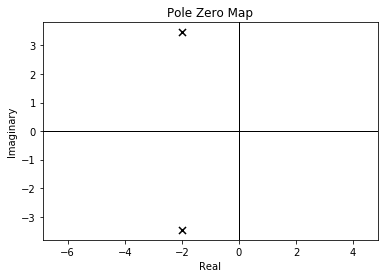

In [68]:
p = pzmap(sysmf_ss)
print(ss2tf(sysmf_ss))

### Simulação da FT de espaço de estados
$$ G_f(s) = \frac{G_P}{1 + K_1 s G_P + K_2 G_p} $$

In [86]:
Gp = tf([2], [1, 0.5, 0])
s = tf([1, 0], [1]) 
K1, K2 = K[0][0], K[0][1]

Gf = Gp / (1 + K1*s*Gp +K2*Gp) #K0 * 
print(Gf)
print( K1, K2)


        7.854 s^4 + 7.854 s^3 + 1.964 s^2
-------------------------------------------------
s^6 + 8.5 s^5 + 39.69 s^4 + 33.82 s^3 + 7.986 s^2

3.5 15.971600000000004


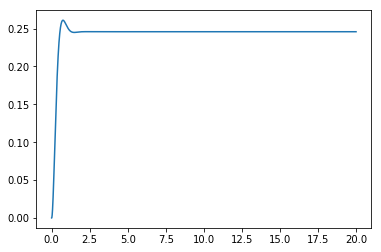

In [87]:
T = np.arange(0,20,.001)
T, y = step_response(Gf, T) 

plt.plot(T,y)

In [88]:
def step_info(t, y): 
  OS = (y.max()/y[-1]-1)*100
  try:
      i10 = next(i for i in range(0,len(y)-1) if y[i]>=y[-1]*.10)
      Tr = round(t[next(i for i in range(i10,len(y)-1) if y[i]>=y[-1]*.90)]-t[i10],2)
  except StopIteration:
      Tr = "unknown"
  try:
      Ts = round(
          t[next(len(y)-i 
                 for i in range(2,len(y)-1) 
                 if (abs(y[-i]/y[-1])>1.02 or abs(y[-i]/y[-1])<0.98))]-t[0],2)
  except StopIteration:
      Ts = "unknown"
      
  return OS, Tr, Ts

In [89]:
T = np.arange(0,20,.001)
T, y = step_response(Gf, T) 

In [90]:
OS, Tr, Ts = step_info(T, y)
print("OS: %f" %OS,"%")
print("Tr: %f" %Tr,"s")
print("Ts: %f" %Ts,"s")

OS: 6.166431 %
Tr: 0.360000 s
Ts: 1.060000 s
